In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
sales = pd.read_csv("SalesData.csv")
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [54]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
AccountId             3709 non-null int64
AccountName           3709 non-null object
Region                3709 non-null object
Division              3709 non-null object
City                  3709 non-null object
State                 3709 non-null object
Tier                  3709 non-null object
Month                 3709 non-null object
Sales2015             3709 non-null float64
Sales2016             3709 non-null float64
Units2015             3709 non-null float64
Units2016             3709 non-null float64
TargetAchevied2015    3709 non-null float64
TargetAchevied2016    3709 non-null float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [6]:
# Check for the missing values in df
sales[sales.isna()].count()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

### 1. Compare Sales by region for 2016 with 2015 using bar chart

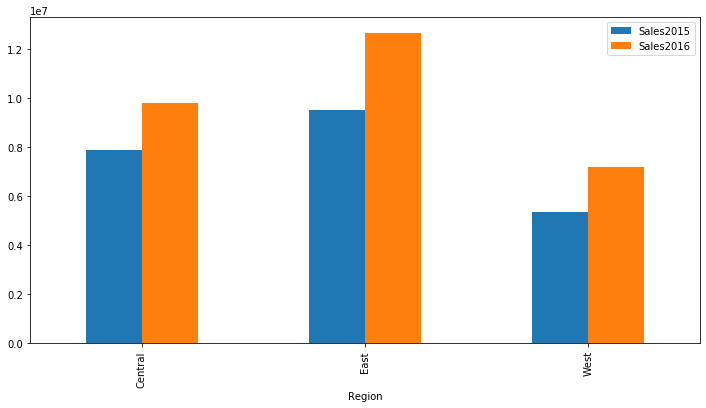

In [15]:
sales1 = sales.groupby(['Region'])[['Sales2015','Sales2016']].agg(sum)

sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8791318710>,
      dtype=object)

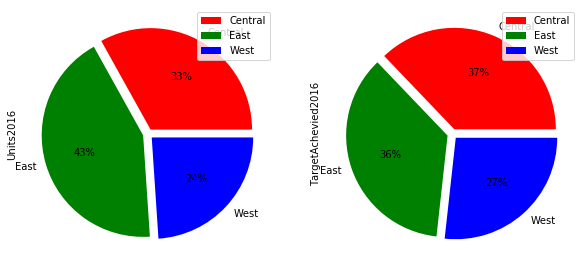

In [53]:
sales2 = sales.groupby(['Region']).aggregate({'Units2016':sum,'TargetAchevied2016':sum })
sales2
sales2.plot(kind='pie', 
            labels=['Central', 'East','West'], 
            explode=(0.05,0.05,0.05),
            colors=['r', 'g','b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots = 'true',figsize=(10,6))
            

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

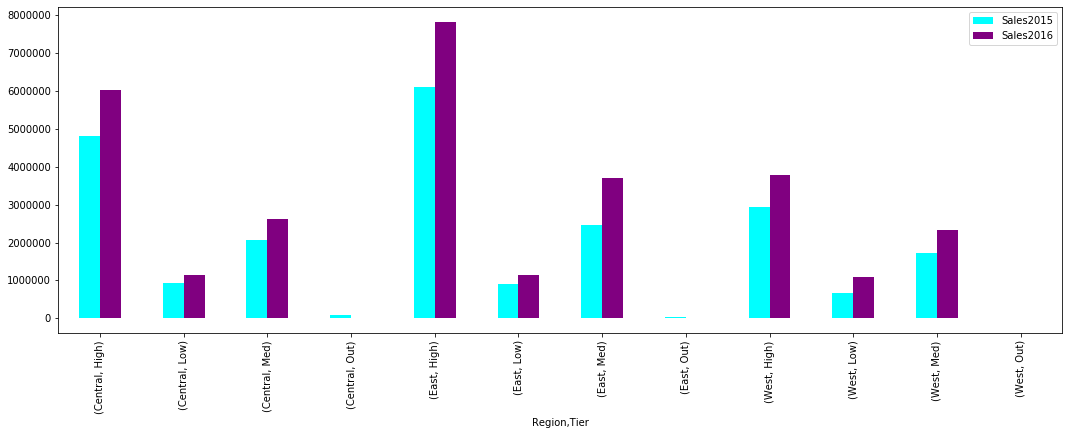

In [59]:
sales3 = sales.groupby(['Region','Tier']).aggregate({'Sales2015':sum, 'Sales2016':sum})

sales3graph=sales3.plot.bar(figsize=(18,6),
                           color= ('cyan','purple'))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

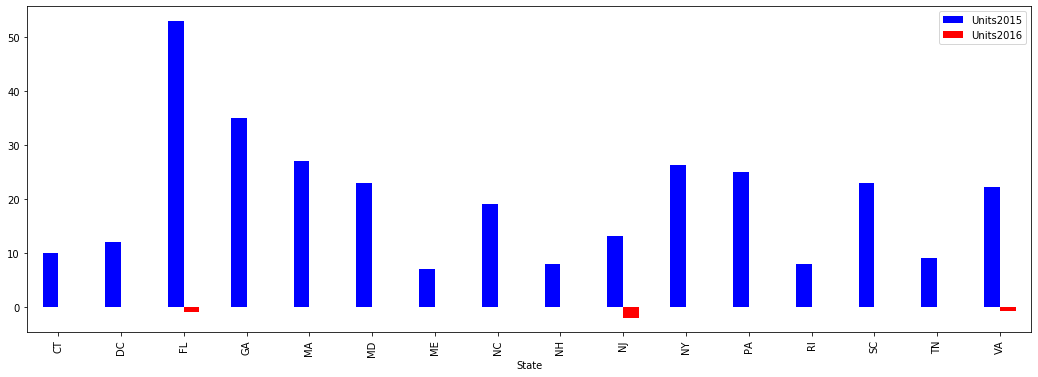

In [121]:
sales4 = sales[sales.Region== 'East'].groupby('State')[['Units2015','Units2016']].agg({'Units2015':max, 'Units2016':min})

sales4.plot.bar(figsize=(18,6),color= ('blue','red'))


### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

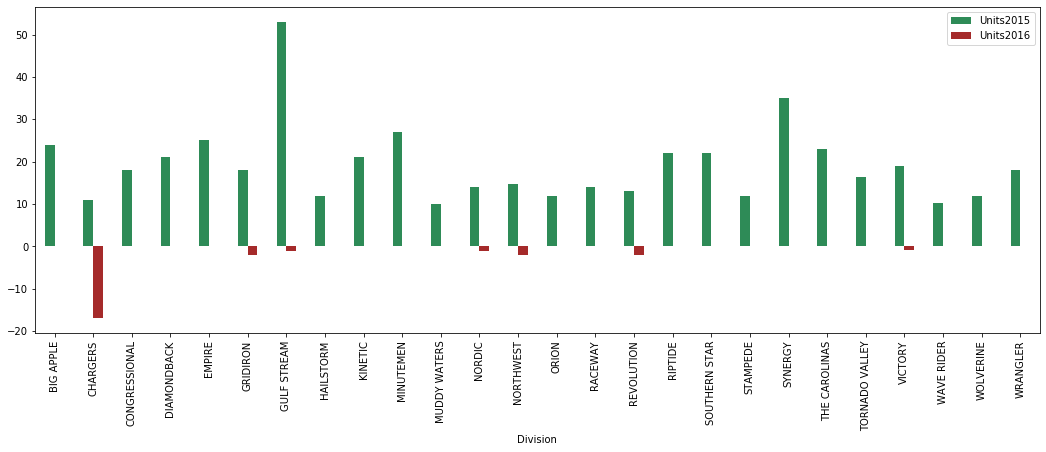

In [120]:
sales5 = sales[sales.Tier== 'High'].groupby('Division')[['Units2015','Units2016']].agg({'Units2015':max, 'Units2016':min})

sales5.plot.bar(figsize=(18,6),color= ('seagreen','brown'))


### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [123]:
sales['Qtr']= np.where((sales.Month == 'Jan') |(sales.Month == 'Feb') | (sales.Month == 'Mar'), 'Q1', 
                       np.where((sales.Month == 'Apr' )|(sales.Month == 'May' )| (sales.Month == 'Jun'), 'Q2',
                                np.where((sales.Month == 'Jul') |(sales.Month == 'Aug') | (sales.Month == 'Sep'), 'Q3','Q4')))

In [124]:
sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

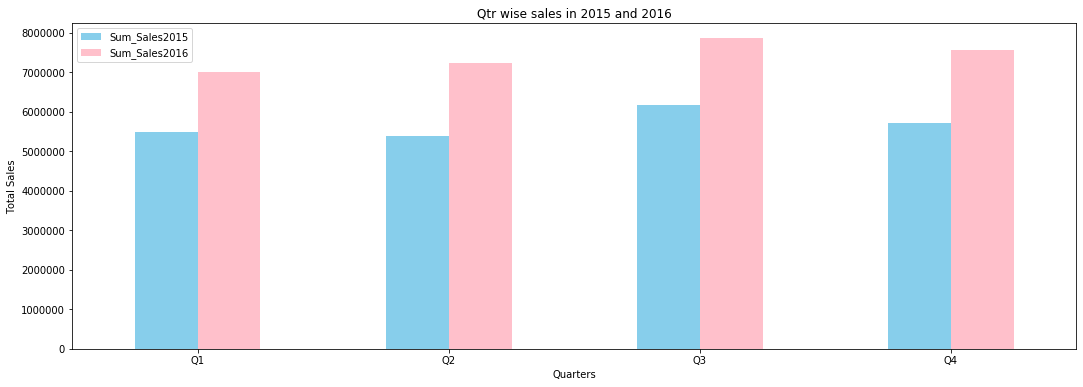

In [148]:
s6= sales.groupby(by= 'Qtr')[['Sales2015','Sales2016']].sum().add_prefix('Sum_')
s6.plot.bar(figsize=(18,6),color= ('skyblue','pink'))
plt.ylabel("Total Sales")
plt.xlabel("Quarters")
plt.title("Qtr wise sales in 2015 and 2016")
plt.xticks(rotation = 0)

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [170]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
sales8 = sales[sales['Tier']!='Out']
sales8 = sales8.groupby(['Qtr','Tier']).aggregate({'Sales2016': sum})
sales8 = sales8.round(decimals=0)
sales8 = sales8.stack() # long to wide data
sales8 = sales8.unstack(level=0)
sales8

,Qtr,Q1,Q2,Q3,Q4
Tier,,,,,
High,Sales2016,3867719.0,4130953.0,4872559.0,4740002.0
Low,Sales2016,948833.0,890595.0,795178.0,742659.0
Med,Sales2016,2181402.0,2215814.0,2197058.0,2085207.0


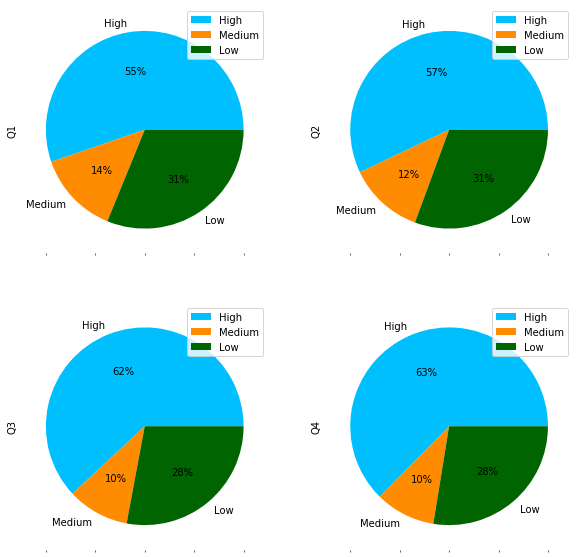

In [171]:
sales8.plot(kind='pie', 
            labels=['High','Medium','Low'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()